In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

In [98]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest

#### PCA

In [3]:
iris = load_iris()

In [4]:
iris_X, iris_y = iris.data, iris.target

iris_X.shape, iris_y.shape

((150, 4), (150,))

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_X[iris_y==0, 0].real

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [8]:
def plot(X, y, col1=0, col2=1, xlabel=None, ylabel=None):
    plt.figure(figsize=(6, 4))
    for marker, val in zip('osv', np.unique(y)):

        plt.scatter(X[y==val, col1], X[y==val, col2], 
                    marker=marker, label=iris.target_names[val], alpha=.6)
    plt.legend(loc='best')
    plt.xlabel(xlabel or iris.feature_names[col1])
    plt.ylabel(ylabel or iris.feature_names[col2])

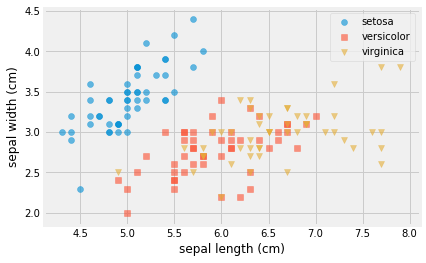

In [9]:
plot(iris_X, iris_y, 0, 1)

In [10]:
mean_X = iris_X.mean(axis=0)

In [11]:
mean_X

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [12]:
cov_X = np.cov((iris_X - mean_X).T)

In [13]:
cov_X

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

In [14]:
eig_val, eig_vec = np.linalg.eig(cov_X)

In [15]:
eig_val.shape, eig_vec.shape

((4,), (4, 4))

In [16]:
eig_vec[:, 2]

array([-0.58099728,  0.59641809,  0.07252408,  0.54906091])

In [17]:
eig_val

array([4.22484077, 0.24224357, 0.07852391, 0.02368303])

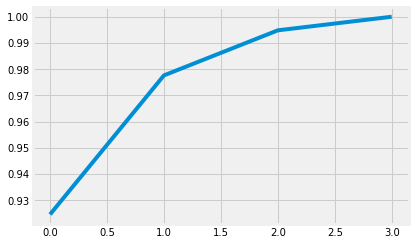

In [18]:
plt.plot(np.cumsum(eig_val / eig_val.sum()))

In [19]:
top_2_eigenvecs = eig_vec[:, :2]    # row vec

In [20]:
top_2_eigenvecs.shape

(4, 2)

In [21]:
X_2d = np.dot(iris_X-mean_X, top_2_eigenvecs)
X_2d.shape

(150, 2)

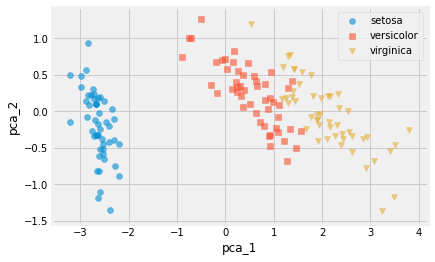

In [22]:
plot(X_2d, iris_y, xlabel='pca_1', ylabel='pca_2')

In [23]:
# sklearn PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_X)

In [24]:
X_pca.shape

(150, 2)

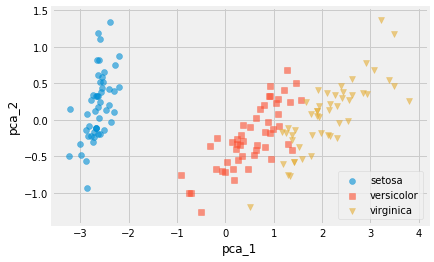

In [25]:
plot(X_pca, iris_y, xlabel='pca_1', ylabel='pca_2')

In [26]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [27]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [28]:
top_2_eigenvecs.T

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [-0.65653988, -0.72971237,  0.1757674 ,  0.07470647]])

In [29]:
np.corrcoef(iris_X.T).round(2)

array([[ 1.  , -0.11,  0.87,  0.82],
       [-0.11,  1.  , -0.42, -0.36],
       [ 0.87, -0.42,  1.  ,  0.96],
       [ 0.82, -0.36,  0.96,  1.  ]])

In [30]:
np.corrcoef(PCA().fit_transform(iris_X).T).round(2)

array([[ 1., -0., -0.,  0.],
       [-0.,  1., -0.,  0.],
       [-0., -0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

#### How centering and scaling data affect PCA

In [31]:
X_centered = StandardScaler(with_mean=True, with_std=False).fit_transform(iris_X)
X_scaled = StandardScaler().fit_transform(iris_X)

Text(0.5,1,'X: centered')

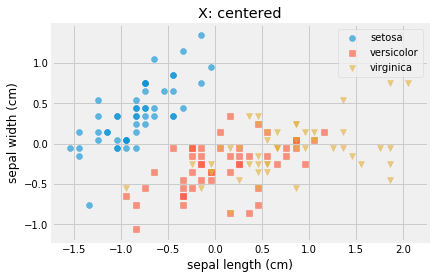

In [32]:
plot(X_centered, iris_y)
plt.title('X: centered')

Text(0.5,1,'X: scaled')

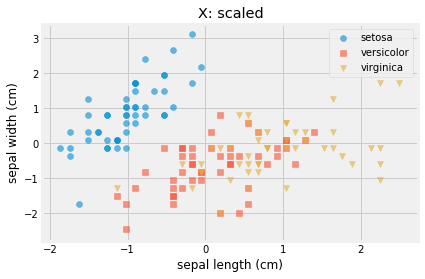

In [33]:
plot(X_scaled, iris_y)
plt.title('X: scaled')

Text(0.5,1,'X: original')

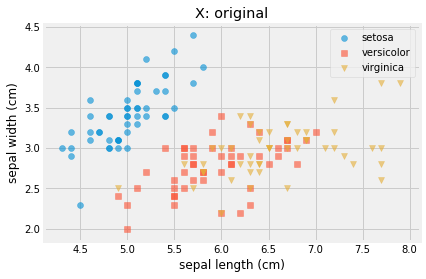

In [34]:
plot(iris_X, iris_y)
plt.title('X: original')

In [35]:
pca_original = PCA(n_components=2).fit(iris_X)
pca_centered = PCA(n_components=2).fit(X_centered)
pca_scaled = PCA(n_components=2).fit(X_scaled)

In [36]:
pca_original.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [37]:
pca_centered.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [38]:
pca_scaled.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

Text(0.5,1,'PCA: original')

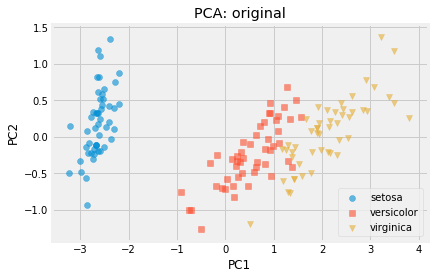

In [39]:
plot(pca_original.transform(iris_X), iris_y, xlabel='PC1', ylabel='PC2')
plt.title('PCA: original')

Text(0.5,1,'PCA: Centered')

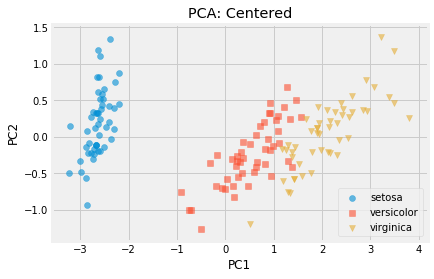

In [40]:
plot(pca_centered.transform(X_centered), iris_y, xlabel='PC1', ylabel='PC2')
plt.title('PCA: Centered')

Text(0.5,1,'PCA: Scaled')

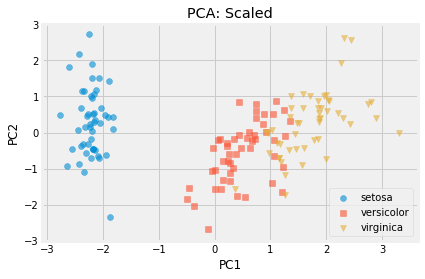

In [41]:
plot(pca_scaled.transform(X_scaled), iris_y, xlabel='PC1', ylabel='PC2')
plt.title('PCA: Scaled')

In [42]:
pca_original.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [43]:
pca_centered.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [44]:
pca_scaled.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [45]:
iris_2d = iris_X[:, 2:]
iris_2d -= iris_2d.mean(axis=0)
iris_2d.shape

(150, 2)

Text(0.5,1,'Iris: 2D')

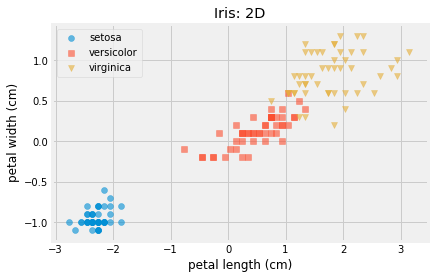

In [46]:
plot(iris_2d, iris_y, xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
plt.title('Iris: 2D')

In [47]:
pca_2d = PCA()
iris_2d_pca = pca_2d.fit_transform(iris_2d)

Text(0.5,1,'Iris-PCA: 2D')

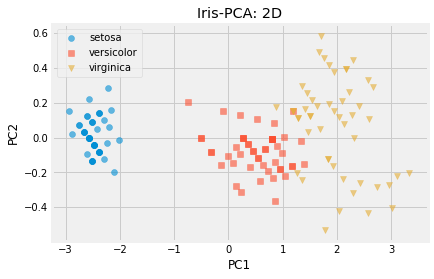

In [48]:
plot(iris_2d_pca, iris_y, xlabel="PC1", ylabel="PC2")
plt.title("Iris-PCA: 2D")

In [49]:
pca_2d.explained_variance_ratio_

array([0.99019934, 0.00980066])

In [50]:
def draw_vector(v0, v1, ax):
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

Text(0,0.5,'component 2')

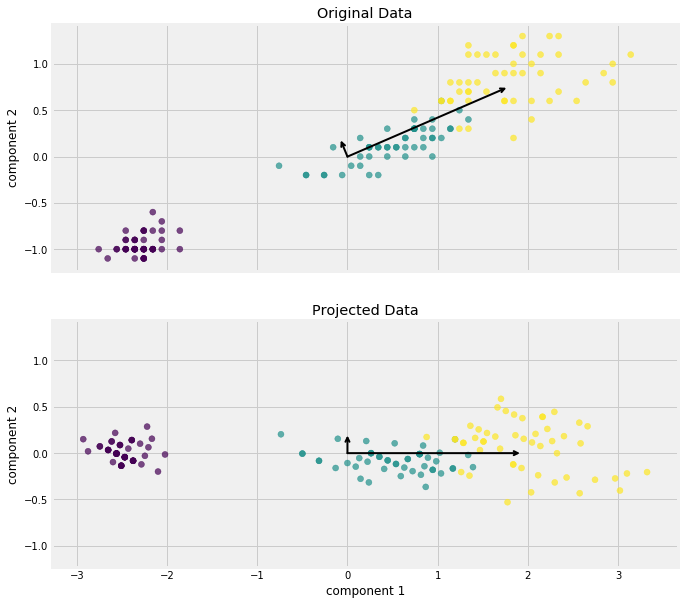

In [51]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 10))

ax[0].set_title('Original Data')
ax[0].scatter(iris_2d[:, 0], iris_2d[:, 1], c=iris_y, alpha=.7)
for length, vec in zip(pca_2d.explained_variance_, pca_2d.components_):
    v = vec * np.sqrt(length)
    v0 = pca_2d.mean_
    v1 = v0 + v
    draw_vector(v0, v1, ax[0])
    
ax[1].set_title('Projected Data')
ax[1].scatter(iris_2d_pca[:, 0], iris_2d_pca[:, 1], c=iris_y, alpha=.7)
for length, vec in zip(pca_2d.explained_variance_, pca_2d.components_):
    v = pca_2d.transform([vec])[0] * np.sqrt(length)
    v0 = iris_2d_pca.mean(axis=0)
    v1 = v0 + v
    draw_vector(v0, v1, ax[1])
    
ax[1].set_xlabel('component 1')
ax[1].set_ylabel('component 2')
ax[0].set_ylabel('component 2')

#### Linear Discriminant Analysis

In [52]:
np.unique(iris_y)

array([0, 1, 2])

In [53]:
# calculate within class scatter matrix
S_w = np.zeros(shape=(iris_X.shape[1], iris_X.shape[1]))
for cls in np.unique(iris_y):
    X_i = iris_X[iris_y==cls, :]
    mean_i = X_i.mean(axis=0)
    S_w += np.dot((X_i - mean_i).T, (X_i - mean_i))

In [54]:
S_w

array([[38.9562, 13.683 , 24.614 ,  5.6556],
       [13.683 , 17.035 ,  8.12  ,  4.9132],
       [24.614 ,  8.12  , 27.22  ,  6.2536],
       [ 5.6556,  4.9132,  6.2536,  6.1756]])

In [55]:
# calculate between class scatter matrix
S_b = np.zeros_like(S_w)

mean_all = iris_X.mean(axis=0)
for cls in np.unique(iris_y):
    mean_i = iris_X[iris_y==cls, :].mean(axis=0)
    n = (iris_y == cls).sum()
    S_b += n*np.outer(mean_i - mean_all, mean_i - mean_all)

In [56]:
S_b

array([[ 63.21213333, -19.534     , 165.16466667,  71.36306667],
       [-19.534     ,  10.9776    , -56.0552    , -22.4924    ],
       [165.16466667, -56.0552    , 436.64373333, 186.90813333],
       [ 71.36306667, -22.4924    , 186.90813333,  80.60413333]])

In [57]:
# find eigen-vec, eigen-val for S_w.inv * S_b
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_w), S_b))

In [58]:
# only n-1 vals -> 3-1 = 2
eig_vals

array([ 3.22719578e+01,  2.77566864e-01, -2.53567257e-16,  5.33278969e-15])

In [59]:
# column => eigen vector
eig_vecs

array([[ 0.20490976, -0.00898234, -0.85298002,  0.40306192],
       [ 0.38714331, -0.58899857,  0.19344686, -0.43391369],
       [-0.54648218,  0.25428655,  0.15018154, -0.48394257],
       [-0.71378517, -0.76703217,  0.4609218 ,  0.64425118]])

In [60]:
# explain variance ratios
eig_vals / eig_vals.sum()

array([ 9.91472476e-01,  8.52752434e-03, -7.79019846e-18,  1.63836177e-16])

In [61]:
linear_discriminant = eig_vecs[:, :2]
linear_discriminant.shape

(4, 2)

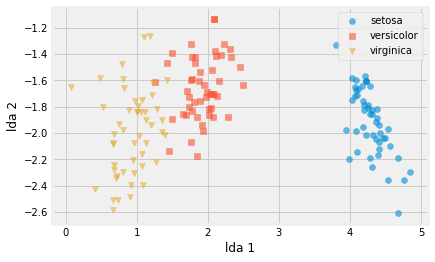

In [62]:
iris_lda = np.dot(iris_X, linear_discriminant)
plot(iris_lda, iris_y, xlabel='lda 1', ylabel='lda 2')

In [63]:
linear_discriminant

array([[ 0.20490976, -0.00898234],
       [ 0.38714331, -0.58899857],
       [-0.54648218,  0.25428655],
       [-0.71378517, -0.76703217]])

#### How to use LDA in scikit-learn

In [64]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [65]:
X_iris_lda = lda.fit_transform(iris_X, iris_y)

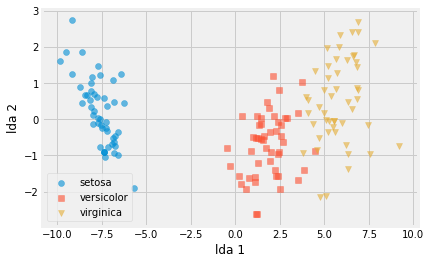

In [66]:
plot(X_iris_lda, iris_y, xlabel='lda 1', ylabel='lda 2')

In [67]:
lda.scalings_

array([[-0.81926852,  0.03285975],
       [-1.5478732 ,  2.15471106],
       [ 2.18494056, -0.93024679],
       [ 2.85385002,  2.8060046 ]])

In [68]:
lda.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [69]:
lda.scalings_ / linear_discriminant

array([[-3.99819178, -3.65826194],
       [-3.99819178, -3.65826194],
       [-3.99819178, -3.65826194],
       [-3.99819178, -3.65826194]])

In [70]:
iris_2d_lda = lda.fit_transform(iris_2d, iris_y)

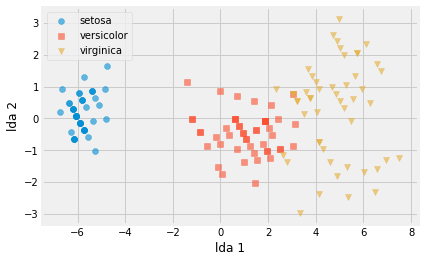

In [71]:
plot(iris_2d_lda, iris_y, xlabel='lda 1', ylabel='lda 2')

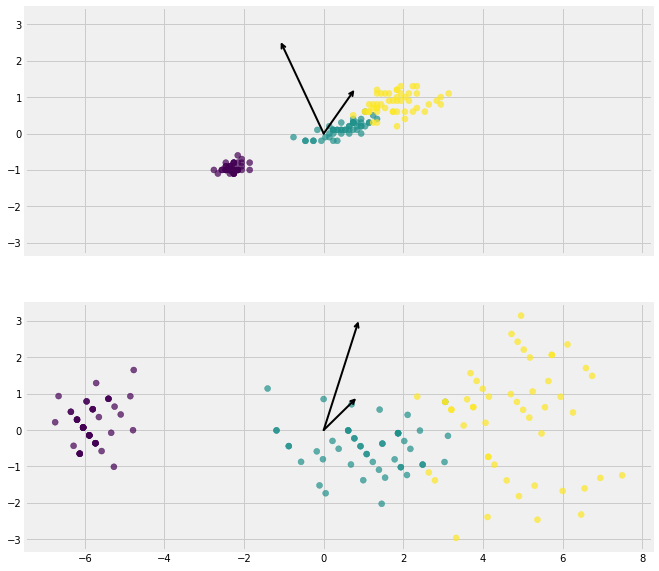

In [77]:
lda = LinearDiscriminantAnalysis(n_components=2)
iris_2d_lda = lda.fit_transform(iris_2d, iris_y)

fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True, sharey=True)

ax[0].scatter(iris_2d[:, 0], iris_2d[:, 1], c=iris_y, alpha=.7)
for vec in lda.scalings_.T:
    v = vec * .5
    draw_vector(lda.xbar_, lda.xbar_+ v, ax[0])

ax[1].scatter(iris_2d_lda[:, 0], iris_2d_lda[:, 1], c=iris_y, alpha=.7)
for vec in lda.scalings_.T:
    v = lda.transform([vec])[0] * .1
    draw_vector(iris_2d_lda.mean(axis=0), iris_2d_lda.mean(axis=0)+v, ax[1])

In [73]:
np.corrcoef(iris_2d.T).round(2)

array([[1.  , 0.96],
       [0.96, 1.  ]])

In [74]:
np.corrcoef(iris_2d_lda.T).round(2)

array([[1., 0.],
       [0., 1.]])

#### PCA vs. LDA

In [87]:
knn = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': [3, 4, 5, 6, 7]})
knn.fit(iris_X, iris_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
knn.best_params_, knn.best_score_

({'n_neighbors': 5}, 0.9866666666666667)

In [89]:
pca_1 = PCA(n_components=1)
lda_1 = LinearDiscriminantAnalysis(n_components=1)
knn = KNeighborsClassifier(n_neighbors=3)

In [91]:
# baseline - pure KNN
knn_average = cross_val_score(knn, iris_X, iris_y).mean()
knn_average

0.9803921568627452

In [92]:
# pipeline - LDA + KNN
lda_pipe = Pipeline([
    ('lda', lda_1),
    ('knn', knn),
])

lda_average = cross_val_score(lda_pipe, iris_X, iris_y).mean()
lda_average

0.9673202614379085

In [93]:
# pipeline - PCA + KNN
pca_pipe = Pipeline([
    ('pca', pca_1),
    ('knn', knn),
])

pca_average = cross_val_score(pca_pipe, iris_X, iris_y).mean()
pca_average

0.8941993464052288

In [95]:
lda_pipe.set_params(**{'lda__n_components': 2})

Pipeline(memory=None,
     steps=[('lda', LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))])

In [97]:
lda_average = cross_val_score(lda_pipe, iris_X, iris_y).mean()
lda_average

0.9803921568627452

In [101]:
# pipeline - SelectKBest + KNN
for k in [1,2,3]:
    kbest_pipe = Pipeline([
        ('kbest', SelectKBest(k=k)),
        ('knn', knn),
    ])
    
    kbest_average = cross_val_score(kbest_pipe, iris_X, iris_y).mean()
    print("k={}, average acc: {:.4f}".format(k, kbest_average))

k=1, average acc: 0.9538
k=2, average acc: 0.9608
k=3, average acc: 0.9739


In [104]:
def get_best_model_and_accuracy(model, params, X, y):
    
    # training
    grid = GridSearchCV(model, params, error_score=0.0)
    grid.fit(X, y)
    
    # display results
    print("Best Accuracy: {:.4f}".format(grid.best_score_))
    print("Best parameters:{}".format(grid.best_params_))
    print("Avg. Training time[s]: {:3f}".format(grid.cv_results_['mean_fit_time'].mean()))
    print("Avg. Predict time[s]: {:.3f}".format(grid.cv_results_['mean_score_time'].mean()))

In [105]:
# pipeline - Scaler + PCA + LDA + KNN

preprocessing = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lda', LinearDiscriminantAnalysis()),
])

iris_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('clf', KNeighborsClassifier()),
])

iris_params = {
    'preprocessing__scaler__with_mean': [True, False],
    'preprocessing__scaler__with_std': [True, False],
    'preprocessing__pca__n_components': [1,2,3,4],
    'preprocessing__lda__n_components': [1, 2],
    'clf__n_neighbors': range(1, 9),
}

get_best_model_and_accuracy(iris_pipe, iris_params, iris_X, iris_y)

Best Accuracy: 0.9867
Best parameters:{'clf__n_neighbors': 3, 'preprocessing__scaler__with_mean': True, 'preprocessing__lda__n_components': 2, 'preprocessing__pca__n_components': 3, 'preprocessing__scaler__with_std': False}
Avg. Training time[s]: 0.003625
Avg. Predict time[s]: 0.002
